In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import missingno as msn
import datetime

In [2]:
df = pd.read_parquet("escooter_history_2022.parquet")

In [3]:
df

,datetime,holiday,workingday,weather,temp,atemp,humidity,windspeed,registered_customer
0,2020-01-04 00:00:09,0.0,0.0,"clear, few clouds",9.84,14.395,81.0,0.0000,True
1,2020-01-04 00:00:41,0.0,0.0,"clear, few clouds",9.84,14.395,81.0,0.0000,True
2,2020-01-04 00:01:20,0.0,0.0,"clear, few clouds",9.84,14.395,81.0,0.0000,True
3,2020-01-04 00:04:12,0.0,0.0,"clear, few clouds",9.84,14.395,81.0,0.0000,True
4,2020-01-04 00:15:19,0.0,0.0,"clear, few clouds",9.84,14.395,81.0,0.0000,True
...,...,...,...,...,...,...,...,...,...
3755410,2022-01-03 23:58:10,0.0,1.0,"clear, few clouds",10.66,13.635,65.0,8.9981,True
3755411,2022-01-03 23:58:28,0.0,1.0,"clear, few clouds",10.66,13.635,65.0,8.9981,True
3755412,2022-01-03 23:58:46,0.0,1.0,"clear, few clouds",10.66,13.635,65.0,8.9981,True
3755413,2022-01-03 23:59:16,0.0,1.0,"clear, few clouds",10.66,13.635,65.0,8.9981,True


In [9]:
df.dtypes

datetime               datetime64[ns]
holiday                       float64
workingday                    float64
weather                        object
temp                          float64
atemp                         float64
humidity                      float64
windspeed                     float64
registered_customer           boolean
dtype: object

<AxesSubplot:>

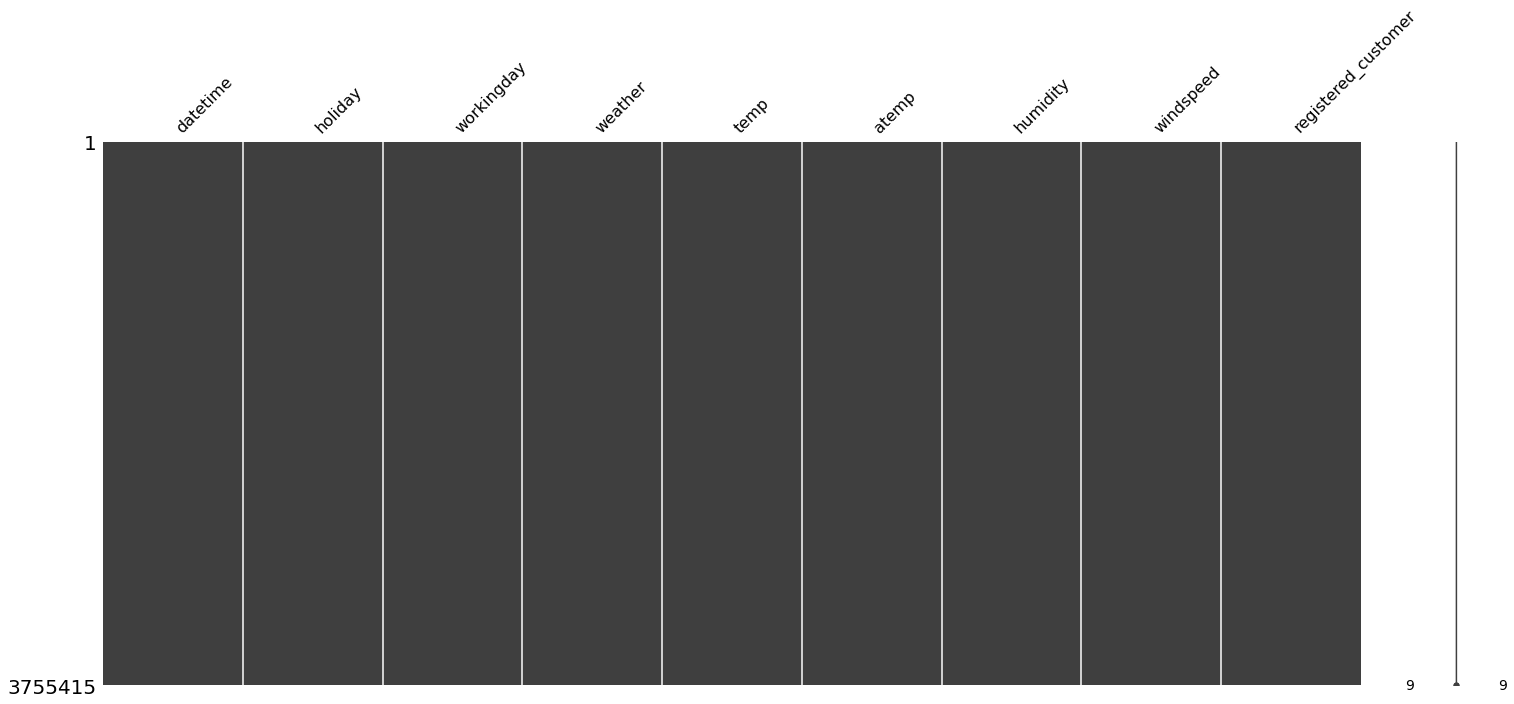

In [14]:
msn.matrix(df)

In [5]:
# df = df.set_index('date')
df_slice1 = df.groupby(pd.Grouper(key="datetime",freq="D")).count()

In [7]:
df_slice1 = df.groupby(df.datetime.year, df.datetime.month, df.datetime.day).count()

AttributeError: 'Series' object has no attribute 'year'

In [6]:
df_slice1

,holiday,workingday,weather,temp,atemp,humidity,windspeed,registered_customer
datetime,,,,,,,,
2020-01-04,985,985,985,985,985,985,985,985
2020-01-05,801,801,801,801,801,801,801,801
2020-01-06,1349,1349,1349,1349,1349,1349,1349,1349
2020-01-07,1562,1562,1562,1562,1562,1562,1562,1562
2020-01-08,1600,1600,1600,1600,1600,1600,1600,1600
...,...,...,...,...,...,...,...,...
2021-12-30,4231,4231,4231,4231,4231,4231,4231,4231
2021-12-31,8144,8144,8144,8144,8144,8144,8144,8144
2022-01-01,5932,5932,5932,5932,5932,5932,5932,5932


In [12]:
px.scatter(df_slice1, x=df_slice1.index, y="registered_customer")